In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from visualization import per_architecture_backward_visualize, per_architecture_timesave_visualize, per_architecture_time_visualize, time_visualize

# Recorded Data

In [3]:
# 100 epochs each
data = np.array([
    # ['GraphSage','1',0,0,63],
    # ['GraphSage','2',0,0,45],
    # ['GraphSage','3',0,0,38],
    # ['GraphSage','4',0,0,36],
    # ['GCN, 1032 (No Sync)','1',20.493320716515882,8.886360266042175,30.129091926006367],
    # ['GCN, 1032 (No Sync)','2',10.101747540320503,4.332710637827404,14.820007350994274],
    # ['GCN, 1032 (No Sync)','3',7.084352586098248,2.987977896700613,10.340268292988185],
    # ['GCN, 1032 (No Sync)','4',5.513166963180993,2.33337817832944,8.05299507098971],
    # ['GCN, 91302 (No Sync)','1',21.418931563122896,12.74918604301638,34.91040612701909],
    # ['GCN, 91302 (No Sync)','2',11.988793305325089,6.073976311017759,18.830450704001123],
    # ['GCN, 91302 (No Sync)','3',7.626138022809755,4.040917023608927,11.955998360994272],
    # ['GCN, 91302 (No Sync)','4',6.260444950865349,3.392984755919315,9.876888113009045],
    # ['GCN, 1032 Params','1',20.105493029899662,9.257247774803545,30.099264652992133],
    # ['GCN, 1032 Params','2',10.007511413947213,6.211184888903517,16.606522115005646],
    # ['GCN, 1032 Params','3',7.988323143188609,6.058900479372824,14.362335459998576],
    # ['GCN, 1032 Params','4',7.3486666590033565,6.585823955741944,14.217244132014457],
    # ['GCN, 91302 Params','1',22.0089265833667,13.459854033222655,36.240488319977885],
    # ['GCN, 91302 Params','2',11.796605543408077,9.540089427377097,21.843346803012537],
    # ['GCN, 91302 Params','3',9.239567982498556,8.968158911098726,18.607978877989808],
    # ['GCN, 91302 Params','4',8.01007054100046, 9.122747796762269, 17.480196406017058],
    # ['GCN, 91302 (Skip 10)','1',21.764182391721988,14.760542787320446,37.29480585700367],
    # ['GCN, 91302 (Skip 10)','2',11.291009680659045,8.753637378948042,20.49537957800203],
    # ['GCN, 91302 (Skip 10)','3',9.103775252820924,8.507102872536052,17.995450880989665],
    # ['GCN, 91302 (Skip 10)','4',7.85412518211524,8.421780110162217,16.611743643996306],
    
    # Separate CL Instance
    ['GCN, 91302 (Gather-Scatter)','1',23.982485175904003,16.575810953050677,41.49150650600495],
    ['GCN, 91302 (Gather-Scatter)','2',18.427578734976123,19.511775435916206,39.529662216998986],
    ['GCN, 91302 (Gather-Scatter)','3',11.932015465950826,19.809229553058685,32.321173219999764],
    ['GCN, 91302 (Gather-Scatter)','4',10.02095135198033,16.944337675973657,27.45832806800172], # Accuracy .688
    ['GCN, 91302 (Ring)','1',23.66542616608058,16.471754937956575,40.921702938001545],
    ['GCN, 91302 (Ring)','2',17.902413366951805,21.694042607086885,41.31823575599992],
    ['GCN, 91302 (Ring)','3',13.061919559942908,20.12188729105401,34.13011894800002],
    ['GCN, 91302 (Ring)','4',9.959033288912906,20.24949542201648,30.698729515002924], # Accuracy .688
    ['GCN, 91302 (Hybrid)','1',23.612739312913618,16.70122764773987,41.11535348499456],
    ['GCN, 91302 (Hybrid)','2',18.210296639044827,21.3081012940238,41.36475110000174],
    ['GCN, 91302 (Hybrid)','3',11.324753803986823,17.34549263399822,29.14028967700142],
    ['GCN, 91302 (Hybrid)','4',8.534762645002047,13.149808060021314,22.00924531799683], # Accuracy .647
    
    # ['GCN, 1032 (Every 10)','1',23.967794478878204,17.88632238093851,42.64483527900302],
    # ['GCN, 1032 (Every 10)','2',9.920597097065183,8.327266276872251,18.63387729600072],
    # ['GCN, 1032 (Every 10)','3',8.758056218051934,8.8206861869985,17.95631108800444],
    # ['GCN, 1032 (Every 10)','4',7.801202750830271,8.549790087090514,16.714416732000245],
    
    # ['GCN, 91302 (Gather-Scatter)','1',18.772138023210573,10.089072151982691,29.553460185001313],
    # ['GCN, 91302 (Gather-Scatter)','2',17.69572240796697,25.558458020925173,44.22245407799346],
    # ['GCN, 91302 (Gather-Scatter)','3',15.27314168994053,23.92266637704597,39.978314623993356],
    # ['GCN, 91302 (Gather-Scatter)','4',11.185380467948562,22.54163558010623,34.39231395100069],
    # ['GCN, 91302 (GS Every 10)','1',18.388209538170486,9.915941933184513,28.987652463001723],
    # ['GCN, 91302 (GS Every 10)','2',10.2616589620593,7.388316983051482,18.075648034995538],
    # ['GCN, 91302 (GS Every 10)','3',7.873910677008098,5.921938204985054,14.137391191994539],
    # ['GCN, 91302 (GS Every 10)','4',6.199531514044793,5.464001080945309,11.929394629994931],
    # ['GCN, 91302 (No Sync)','1',18.544785991914978,10.040765124969766,29.280354863003595],
    # ['GCN, 91302 (No Sync)','2',9.620549993960594,5.345206209975004,15.337708904000465],
    # ['GCN, 91302 (No Sync)','3',6.732069270889042,3.6120919619716005,10.598009191002348],
    # ['GCN, 91302 (No Sync)','4',5.53853250600514,2.980153775999497,8.739278599001409],
    
    # Congested network
    # ['GCN, 91302 (No Sync)','1',23.469623026860063,16.655299685982754,40.92963671700272],
    # ['GCN, 91302 (No Sync)','2',13.11764413718629,8.182932585972594,22.13152533399989],
    # ['GCN, 91302 (No Sync)','3',8.200234381969494,5.505634721128445,14.007824420994439],
    # ['GCN, 91302 (No Sync)','4',7.733734252025897,5.076533362946066,13.187162799004],
    # ['GCN, 91302 (GS Every 10)','1',23.52013498207816,16.258324322057888,40.56649421399925],
    # ['GCN, 91302 (GS Every 10)','2',22.122310012040543,35.885470484041434,60.489143598002556],
    # ['GCN, 91302 (GS Every 10)','3',15.721055182024429,37.03898169405147,53.67086978099542],
    # ['GCN, 91302 (GS Every 10)','4',13.091657499920984,34.24624907202815,48.037003973004175],
    # ['GCN, 91302 (Gather-Scatter)','1',18.772138023210573,10.089072151982691,29.553460185001313],
    # ['GCN, 91302 (Gather-Scatter)','2',17.69572240796697,25.558458020925173,44.22245407799346],
    # ['GCN, 91302 (Gather-Scatter)','3',15.27314168994053,23.92266637704597,39.978314623993356],
    # ['GCN, 91302 (Gather-Scatter)','4',11.185380467948562,22.54163558010623,34.39231395100069],
    # ['GCN, 91302 (Hybrid)','1',23.612739312913618,16.70122764773987,41.11535348499456],
    # ['GCN, 91302 (Hybrid)','2',13.468021085936925,16.12569633998646,30.14710893699521],
    # ['GCN, 91302 (Hybrid)','3',9.082949453957553,13.327582296988112,22.790923471999122],
    # ['GCN, 91302 (Hybrid)','4',6.954355583053257,10.411341672981507,17.660540798999136],
]).squeeze()

# Visualizations

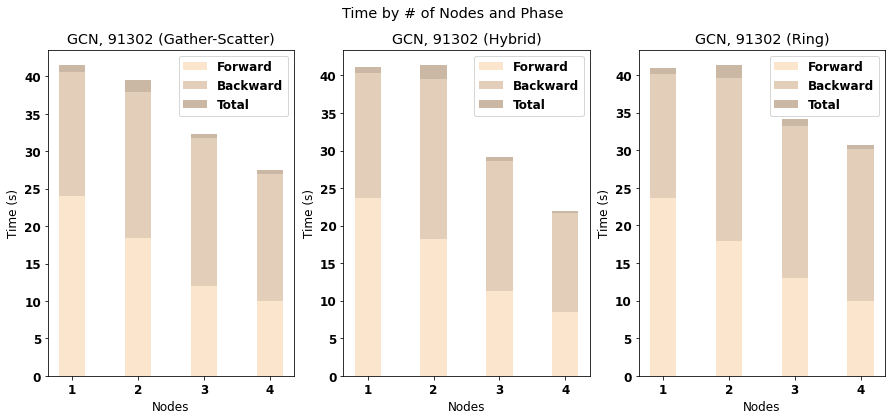

In [4]:
unique_architectures = np.unique(np.array([d[0] for d in data]))
fig, ax = plt.subplots(figsize=(5*len(unique_architectures),6))
fig.suptitle('Time by # of Nodes and Phase')
for i, arch in enumerate(unique_architectures):
    ax = plt.subplot(1, len(unique_architectures), i+1)
    temp = [d[1:] for d in data if d[0] == arch]
    time_visualize(*temp, arch=arch, ax=ax)

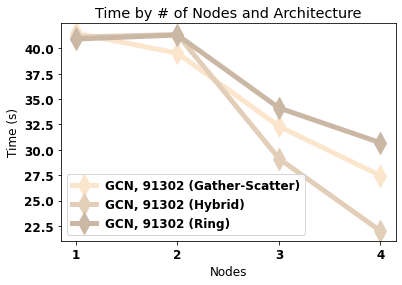

In [5]:
temp = [d[[0,1,4]] for d in data]
per_architecture_time_visualize(*temp)

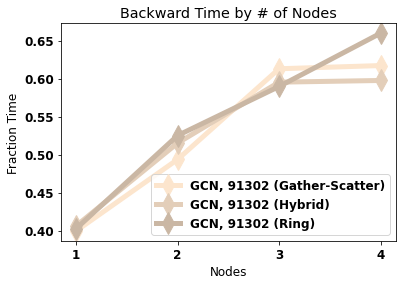

In [6]:
per_architecture_backward_visualize(*data)

In [7]:
# per_architecture_timesave_visualize(data[3], data[7])